**Autor:**
- Íñigo Alegre Jiménez

# Objetivos del ejercicio: BMW PREPROCESING

---
## Propuesta de valor
El objetivo de este ejercicio es realizar la limpieza y el preprocesado de los datos con la finalidad de crear un modelo que pueda predecir el precio de los distintos vehículos vendidos en un concesionario.

## Motivaciones para resolverlo
El desarrollo de un modelo de predicción del precio de los vehículos vendidos en un concesionario puede ofrecer varios beneficios significativos, como:

- *Optimización de precios*: El modelo permitiría ajustar los precios de los vehículos de manera más precisa lo que ayudaría a evitar sobreprecio (que puede reducir las ventas) o precios demasiado bajos (que afectarían los márgenes de ganancia).

- *Mejora en la competitividad*: Al tener un modelo que prediga los precios basados en datos reales y tendencias de mercado, el concesionario podría posicionarse mejor frente a la competencia, ofreciendo precios atractivos y alineados con las expectativas del mercado.

- *Gestión del inventario*: Predecir correctamente el precio de los vehículos puede ayudar a identificar cuáles son más rentables de mantener en el inventario y cuáles podrían ser difíciles de vender. Esto permite una mejor planificación y rotación de stock.

- *Negociaciones más eficientes*: Con un precio recomendado basado en datos, los vendedores tendrían una base sólida para negociar con los clientes, lo que puede agilizar el proceso de venta y aumentar la confianza en las transacciones.

- *Previsión de ingresos*: El modelo también podría ayudar a predecir ingresos futuros, lo que permitiría una mejor planificación financiera y la capacidad de ajustar las estrategias de ventas de acuerdo con las predicciones.

Estos beneficios mejorarían tanto la eficiencia operativa como la experiencia de los clientes, lo que contribuiría a un mejor desempeño del concesionario en el mercado.

---

## Tarea de ML
El problema de estimar el precio que corresponde a un vehículo con ciertas características corresponde a una tarea de regresión lineal.

---

<a id='index'></a>
## Índice

[Importación de librerías](#importacion_librerias)<br>

[Breve EDA](#eda)<br>

## Preprocesamiento y limpieza

[Estudio de duplicados](#duplicados)<br>
[Estudio y limpieza de nulos](#nulos)<br>
[Inferencia de fechas](#fechas)<br>
[Eliminación de meses](#meses)<br>

## Análisis
[Variables categóricas](#categóricas)<br>
[Variables numéricas](#numericas)<br>
[Variables booleanas](#booleanas)<br>
[Correlación entre variables](#corr)<br>
[Análisis target](#target)<br>

## Procesamiento
[Procesamiento de variables](#procesamiento)<br>


## Modelo 
[EXTRA: Modelo de regresión lineal](#modelo)<br>



<a id='importacion_librerias'></a>
# Importación de librerías y dataset
[Volver al índice](#index)

En este apartado hacemos tanto la importación de las principales librerías y métodos que usaremos a lo largo del dataset como el dataframe en sí.

In [45]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [46]:
coches = pd.read_csv('bmw_pricing_v3.csv')
coches.head(5)

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


<a id='eda'></a>
# Breve EDA
[Volver al índice](#index)

En este apartado importamos el dataset y observamos el tamaño del mismo, el tipo de atributos disponibles (numéricos, categóricos), los estadísticos descriptivos más relevantes de cada atributo(valores medios, dispersión, percentiles, etc.) y el número de valores nulos.

In [47]:
coches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [48]:
coches.shape

(4843, 18)

In [49]:
coches.describe()

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


In [50]:
coches.describe(include=['object']).T

,count,unique,top,freq
marca,3873,1,BMW,3873
modelo,4840,76,320,752
fecha_registro,2420,180,2013-07-01,93
tipo_gasolina,4838,5,diesel,4631
color,4398,10,black,1499
tipo_coche,3383,8,estate,1107
volante_regulable,4839,2,True,2662
aire_acondicionado,4357,2,True,3465
camara_trasera,4841,2,False,3864
asientos_traseros_plegables,1452,2,False,1150


## Pasamos a datetime las fechas y dividimos cada una en mes y año ya que el día es siempre el 1 de cada mes

In [51]:
coches['fecha_registro'] = pd.to_datetime(coches['fecha_registro'])
coches['fecha_venta'] = pd.to_datetime(coches['fecha_venta'])

for col in ['fecha_registro', 'fecha_venta']:
    coches[col + '_AÑO'] = coches[col].dt.year
    coches[col + '_MES'] = coches[col].dt.month
    
    del coches[col]

## 1. ¿Qué columnas se eliminaron inicialmente del dataset y por qué?

Unicamente eliminamos la columna de marca hasta este punto debido a que no aporta ningún tipo de información ya que todos los coches son BMW.

In [52]:
del coches['marca']

# Preprocesamiento y limpieza


<a id='duplicados'></a>
## Estudio de duplicados
[Volver al índice](#index)

En este apartado estudiamos la presecia de duplicados.

In [53]:
coches[coches.duplicated(keep='first')].shape

(0, 19)

<a id='nulos'></a>
## Estudio y limpieza de nulos de los nulos
[Volver al índice](#index)

En este apartado llevamos a cabo un estudio de los nulos de cada variable y procedemos a imputar los valores que creemos adecuados.

In [54]:
coches.isna().sum()

modelo                            3
km                                2
potencia                          1
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_registro_AÑO             2423
fecha_registro_MES             2423
fecha_venta_AÑO                   1
fecha_venta_MES                   1
dtype: int64

Procedemos a calcular el porcentaje de nulos de cada una de las columnas de nuestro dataset. En aquellas columnas cuyo porcentaje de nulos sea menor que el 5% eliminaremos las filas que contengan nulos debido a que el porcentaje es irrelevante frente al tamaño del dataset y no afectará al desarrollo del modelo.

In [55]:
def porcentaje_nulos(dataframe,columna):
    porcentaje = round((dataframe[columna].isna().sum() / dataframe.shape[0])*100,2)
    return porcentaje

for i in coches:
    print('Porcentaje nulos en',i,':',porcentaje_nulos(coches,i))

Porcentaje nulos en modelo : 0.06
Porcentaje nulos en km : 0.04
Porcentaje nulos en potencia : 0.02
Porcentaje nulos en tipo_gasolina : 0.1
Porcentaje nulos en color : 9.19
Porcentaje nulos en tipo_coche : 30.15
Porcentaje nulos en volante_regulable : 0.08
Porcentaje nulos en aire_acondicionado : 10.04
Porcentaje nulos en camara_trasera : 0.04
Porcentaje nulos en asientos_traseros_plegables : 70.02
Porcentaje nulos en elevalunas_electrico : 0.04
Porcentaje nulos en bluetooth : 15.03
Porcentaje nulos en gps : 0.0
Porcentaje nulos en alerta_lim_velocidad : 15.03
Porcentaje nulos en precio : 0.12
Porcentaje nulos en fecha_registro_AÑO : 50.03
Porcentaje nulos en fecha_registro_MES : 50.03
Porcentaje nulos en fecha_venta_AÑO : 0.02
Porcentaje nulos en fecha_venta_MES : 0.02


In [56]:
for i in coches:
    if porcentaje_nulos(coches,i) <= 5:
        coches.dropna(subset=i,inplace=True)

coches.isna().sum()

modelo                            0
km                                0
potencia                          0
tipo_gasolina                     0
color                           442
tipo_coche                     1449
volante_regulable                 0
aire_acondicionado              482
camara_trasera                    0
asientos_traseros_plegables    3373
elevalunas_electrico              0
bluetooth                       725
gps                               0
alerta_lim_velocidad            725
precio                            0
fecha_registro_AÑO             2409
fecha_registro_MES             2409
fecha_venta_AÑO                   0
fecha_venta_MES                   0
dtype: int64

Comenzamos a analizar los nulos de aquellas columnas que presentan más de un 5% de nulos.

### Nulos color (creamos nuevo color 'Desconocido')

In [57]:
coches['color'].value_counts(dropna=False)

color
black     1489
grey      1067
blue       643
white      480
NaN        442
brown      302
silver     290
red         47
beige       37
green       14
orange       6
Name: count, dtype: int64

Se observa que tenemos 442 nulos, lo que resulta ser la quinta categoría más significativa de color. Es por ello que para no perder la información de esas 442 filas, lo que supondría casi un 10% de los datos, procedemos a imputar en los nulos el color 'Desconocido'.

In [58]:
coches['color'] = np.where(coches['color'].isna(),'Desconocido',coches['color'])

In [59]:
coches['color'].value_counts(dropna=False)

color
black          1489
grey           1067
blue            643
white           480
Desconocido     442
brown           302
silver          290
red              47
beige            37
green            14
orange            6
Name: count, dtype: int64

### Nulos tipo_coche (nueva categoría 'desconocido')

In [60]:
coches['tipo_coche'].value_counts(dropna=False)

tipo_coche
NaN            1449
estate         1097
sedan           821
suv             754
hatchback       488
subcompact       77
coupe            73
convertible      30
van              28
Name: count, dtype: int64

En este caso, la categoría de nulos es la que más se repite en el tipo de coche con 1449 filas en las que no se conoce el tipo de coche. Es por ello que reemplazamos los nulos por 'Desconocido' al igual que en la variable color para no perder el 30% de filas del dataset las cuales aportan mucha información útil para el modelo.

In [61]:
coches['tipo_coche'] = np.where(coches['tipo_coche'].isna(),'Desconocido',coches['tipo_coche'])
coches['tipo_coche'].value_counts(dropna=False)

tipo_coche
Desconocido    1449
estate         1097
sedan           821
suv             754
hatchback       488
subcompact       77
coupe            73
convertible      30
van              28
Name: count, dtype: int64

### Nulos aire_acondicionado (moda)

In [62]:
coches['aire_acondicionado'].value_counts(dropna=False)

aire_acondicionado
True     3449
False     886
NaN       482
Name: count, dtype: int64

Observando que los coches con aire acondicionado son muchos más que los que no lo tienen, pasamos a imputar la moda en aquellas filas nulas. De este modo no cometeremos mucho error en la inferencia de datos y no perderemos la información que aportan dichas filas.

In [63]:
coches['aire_acondicionado'].fillna(coches['aire_acondicionado'].mode()[0],inplace=True)
coches['aire_acondicionado'].value_counts(dropna=False)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5420\2611906217.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  coches['aire_acondicionado'].fillna(coches['aire_acondicionado'].mode()[0],inplace=True)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5420\2611906217.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True

aire_acondicionado
True     3931
False     886
Name: count, dtype: int64

### Nulos asientos traseros plegables (eliminamos columna)

In [64]:
coches['asientos_traseros_plegables'].value_counts(dropna=False)

asientos_traseros_plegables
NaN      3373
False    1143
True      301
Name: count, dtype: int64

Vemos que el porcentaje de nulos en este caso es altísimo, por lo que antes de inferir el 70% de los datos, acción que podría influir en el modelo de manera negativa, procedemos a eliminar la variable.

In [65]:
del coches['asientos_traseros_plegables']

### Nulos Bluetooth (moda)

In [66]:
coches['bluetooth'].value_counts(dropna=False)

bluetooth
False    3101
True      991
NaN       725
Name: count, dtype: int64

Al igual que con el aire acondicionado, es esta ocasión imputamos la moda debido a la gran diferencia entre los True y False.

In [67]:
coches['bluetooth'].fillna(coches['bluetooth'].mode()[0],inplace=True)
coches['bluetooth'].value_counts(dropna=False)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5420\776108313.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  coches['bluetooth'].fillna(coches['bluetooth'].mode()[0],inplace=True)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5420\776108313.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  coches['bluetoo

bluetooth
False    3826
True      991
Name: count, dtype: int64

### Nulos alerta_limite_velocidad (creamos categoría desconocido y pasamos a categórica)

In [68]:
coches['alerta_lim_velocidad'].value_counts(dropna=False)

alerta_lim_velocidad
True     2226
False    1866
NaN       725
Name: count, dtype: int64

En este caso, la diferencia entre True y False es de tan solo 400 columnas aproximadamente. Debido a que eliminar 700 filas supone una gran perdida de información y puede afectar a la distribución del target, optamos por convertir esta columna en categórica, transformando los valores nulos en 'Desconocido' como hicimos en columnas anteriores.

In [69]:
coches['alerta_lim_velocidad'] = np.where(coches['alerta_lim_velocidad'].isna(),'Desconocido',coches['alerta_lim_velocidad'])
coches['alerta_lim_velocidad'] = np.where(coches['alerta_lim_velocidad']==True,'Sí',coches['alerta_lim_velocidad'])
coches['alerta_lim_velocidad'] = np.where(coches['alerta_lim_velocidad']==False,'No',coches['alerta_lim_velocidad'])


In [70]:
coches['alerta_lim_velocidad'].value_counts(dropna=False)

alerta_lim_velocidad
Sí             2226
No             1866
Desconocido     725
Name: count, dtype: int64

<a id='fechas'></a>
## Inferencia de las Fechas de registro
[Volver al índice](#index)

En este apartado inferimos las fechas de registro.

In [71]:
coches['fecha_registro_AÑO'].value_counts(dropna=False)

fecha_registro_AÑO
NaN       2409
2013.0     754
2014.0     632
2012.0     432
2015.0     162
2011.0     116
2010.0      51
2016.0      46
2008.0      42
2009.0      39
2007.0      29
2006.0      29
2005.0      28
2004.0      10
2001.0       8
2003.0       8
2017.0       5
2002.0       4
1997.0       4
2000.0       3
1999.0       3
1995.0       1
1990.0       1
1994.0       1
Name: count, dtype: int64

Vemos que nos faltan el 50% de los datos referentes a la fecha de registro. Es una gran cantidad de datos y como veremos más adelante está bastante relacionada con el precio por lo que buscamos la manera de inferir estos datos. Lo haremos mediante los kilometros recorridos por cada vehículo. A más distancia recorrida más antigua será su fecha de registro por lo general.

array([[<Axes: title={'center': 'fecha_registro_AÑO'}>]], dtype=object)

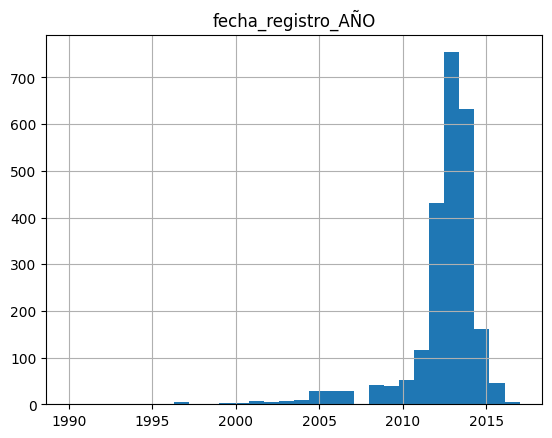

In [72]:
coches.hist('fecha_registro_AÑO',bins=30)

In [73]:
ranges = [(0, 50000), (50001, 100000), (100001, 150000), (150001, 200000), 
          (200001, 250000), (250001, 300000), (300001, 350000), (350001, 400000), 
          (400001, 450000), (450001, 500000)]

for lower, upper in ranges:
    mean_year = int(coches.loc[(coches["fecha_registro_AÑO"].notnull()) & (coches["km"] >= lower) & (coches["km"] <= upper), "fecha_registro_AÑO"].mean())
    
    coches.loc[(coches["fecha_registro_AÑO"].isnull()) & (coches["km"] >= lower) & (coches["km"] <= upper), "fecha_registro_AÑO"] = mean_year

array([[<Axes: title={'center': 'fecha_registro_AÑO'}>]], dtype=object)

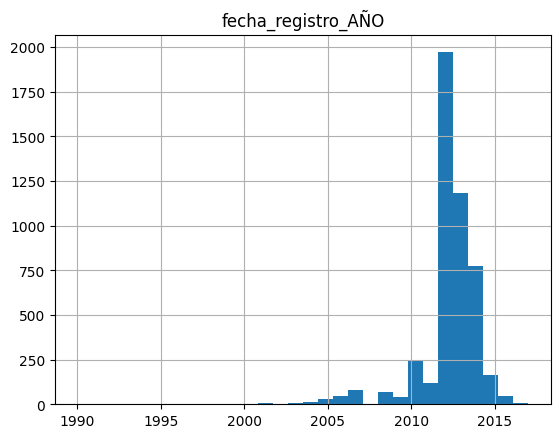

In [74]:
coches.hist('fecha_registro_AÑO',bins=30)

<a id='meses'></a>
## Eliminamos los meses
[Volver al índice](#index)

En este apartado eliminamos las variables que aportan información sobre 'meses' debido a que no aportan información relevante al modelo por no poseer una varianza significativa respecto del target.

<Axes: xlabel='fecha_venta_MES', ylabel='precio'>

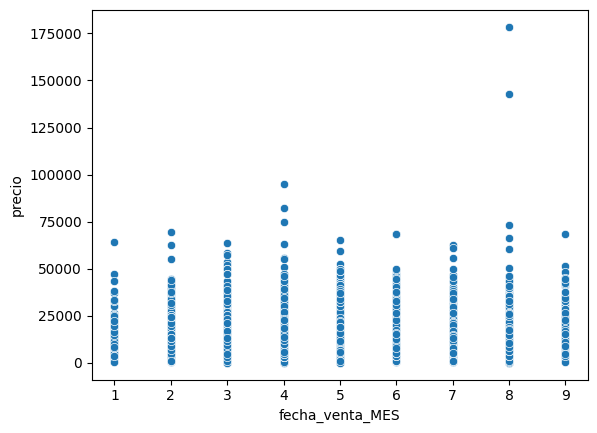

In [75]:
sns.scatterplot(data=coches,x='fecha_venta_MES',y='precio')

<Axes: xlabel='fecha_registro_MES', ylabel='precio'>

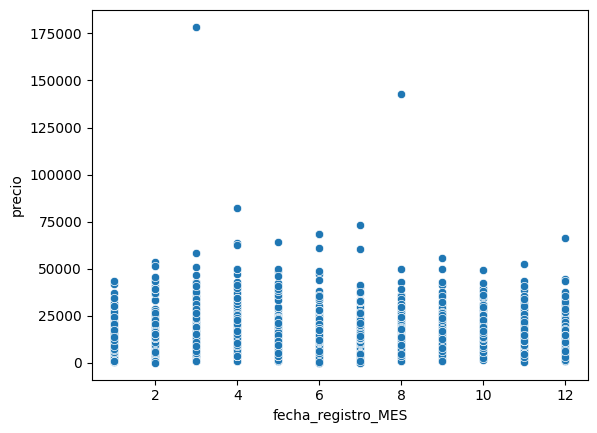

In [76]:
sns.scatterplot(data=coches,x='fecha_registro_MES',y='precio')

In [77]:
coches.isna().sum()

modelo                     0
km                         0
potencia                   0
tipo_gasolina              0
color                      0
tipo_coche                 0
volante_regulable          0
aire_acondicionado         0
camara_trasera             0
elevalunas_electrico       0
bluetooth                  0
gps                        0
alerta_lim_velocidad       0
precio                     0
fecha_registro_AÑO         1
fecha_registro_MES      2409
fecha_venta_AÑO            0
fecha_venta_MES            0
dtype: int64

In [78]:
del coches['fecha_registro_MES']
del coches['fecha_venta_MES']

Vemos que el precio no se ve muy afectado por las variables de los meses por lo que eliminamos estas variables que no proporcionan información relevante para el modelo.

# Análisis

In [79]:
coches2 = coches.copy()
# Definimos el target
target = ['precio']

## Pasamos las variables booleanas a numéricas.

In [80]:
coches2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4817 non-null   object 
 1   km                    4817 non-null   float64
 2   potencia              4817 non-null   float64
 3   tipo_gasolina         4817 non-null   object 
 4   color                 4817 non-null   object 
 5   tipo_coche            4817 non-null   object 
 6   volante_regulable     4817 non-null   object 
 7   aire_acondicionado    4817 non-null   bool   
 8   camara_trasera        4817 non-null   object 
 9   elevalunas_electrico  4817 non-null   object 
 10  bluetooth             4817 non-null   bool   
 11  gps                   4817 non-null   bool   
 12  alerta_lim_velocidad  4817 non-null   object 
 13  precio                4817 non-null   float64
 14  fecha_registro_AÑO    4816 non-null   float64
 15  fecha_venta_AÑO       4817

In [81]:
for col in coches2:
    if coches2[col].dtype.kind == 'b' or ((coches2[col].dtype.kind == 'O') and len(coches2[col].unique()) == 2 and (i not in target)):
            coches2[col] = coches2[col].astype(int)

In [82]:
coches2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4817 non-null   object 
 1   km                    4817 non-null   float64
 2   potencia              4817 non-null   float64
 3   tipo_gasolina         4817 non-null   object 
 4   color                 4817 non-null   object 
 5   tipo_coche            4817 non-null   object 
 6   volante_regulable     4817 non-null   int32  
 7   aire_acondicionado    4817 non-null   int32  
 8   camara_trasera        4817 non-null   int32  
 9   elevalunas_electrico  4817 non-null   int32  
 10  bluetooth             4817 non-null   int32  
 11  gps                   4817 non-null   int32  
 12  alerta_lim_velocidad  4817 non-null   object 
 13  precio                4817 non-null   float64
 14  fecha_registro_AÑO    4816 non-null   float64
 15  fecha_venta_AÑO       4817

## Clasificamos las variables en numéricas,categóricas y booleanas

In [83]:
def obtener_lista_variables(dataset):
    lista_numericas = []
    lista_categoricas = []
    lista_booleanas = []

    for i in dataset:
        if (dataset[i].dtype.kind == 'f' or dataset[i].dtype.kind == 'i') and len(dataset[i].unique())!= 2 and (i not in target):
            lista_numericas.append(i)
        if (dataset[i].dtype.kind == 'f' or dataset[i].dtype.kind == 'i') and len(dataset[i].unique()) == 2 and (i not in target):
            lista_booleanas.append(i)
        if (dataset[i].dtype.kind == 'O') and (i not in target):
            lista_categoricas.append(i)

    return lista_numericas,lista_categoricas,lista_booleanas

numericas,categoricas,booleanas = obtener_lista_variables(coches2)
print(numericas)
print(categoricas)
print(booleanas)

['km', 'potencia', 'fecha_registro_AÑO', 'fecha_venta_AÑO']
['modelo', 'tipo_gasolina', 'color', 'tipo_coche', 'alerta_lim_velocidad']
['volante_regulable', 'aire_acondicionado', 'camara_trasera', 'elevalunas_electrico', 'bluetooth', 'gps']


## Creación de variable antigüedad = 'dif_años'

Se trata de una variable que indica la diferencia en años entre el día que se registra el coche y el día que se vende (representa la antigüedad del coche en el momento de su compra)

In [84]:
coches2['dif_años'] = coches2['fecha_venta_AÑO'] - coches2['fecha_registro_AÑO'] 
coches2['dif_años'].describe()

count    4816.000000
mean        5.771595
std         2.041356
min        -5.000000
25%         5.000000
50%         6.000000
75%         6.000000
max        28.000000
Name: dif_años, dtype: float64

<a id='categóricas'></a>
## Variables categóricas
[Volver al índice](#index)

En este apartado realizamos un análisis de las variables categóricas.


In [85]:
for i in categoricas:
    print(coches2[i].value_counts().to_frame())

                 count
modelo                
320                747
520                630
318                562
X3                 437
116                358
...                ...
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1

[76 rows x 1 columns]
               count
tipo_gasolina       
diesel          4610
petrol           191
hybrid_petrol      8
Diesel             5
electro            3
             count
color             
black         1489
grey          1067
blue           643
white          480
Desconocido    442
brown          302
silver         290
red             47
beige           37
green           14
orange           6
             count
tipo_coche        
Desconocido   1449
estate        1097
sedan          821
suv            754
hatchback      488
subcompact      77
coupe           73
convertible     30
van             28
                      count
alerta_lim_velocidad       
Sí                 

Vemos que todo es más o menos normal pero vemos fallos en el tipo de gasolina al mismo tiempo que algunos outliers que pasaremos a analizar más tarde cuando veamos la relación de estos valores especiales con el precio. (Por ejemplo podemos plantear dejar únicamente el tipo de gasolina diesel debido a que el resto son un porcentaje muy bajo y no representan a penas casos en comparación con los coches con gasolina diesel).

Por lo pronto, corregimos que los valores de Diesel sean diesel.

In [86]:
coches2['tipo_gasolina'] = np.where(coches2['tipo_gasolina'] == 'Diesel', 'diesel', coches2['tipo_gasolina'])

<a id='numericas'></a>
## Variables numéricas
[Volver al índice](#index)

En este apartado realizamos un análisis de las variables numéricas.

### Kilómetros

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


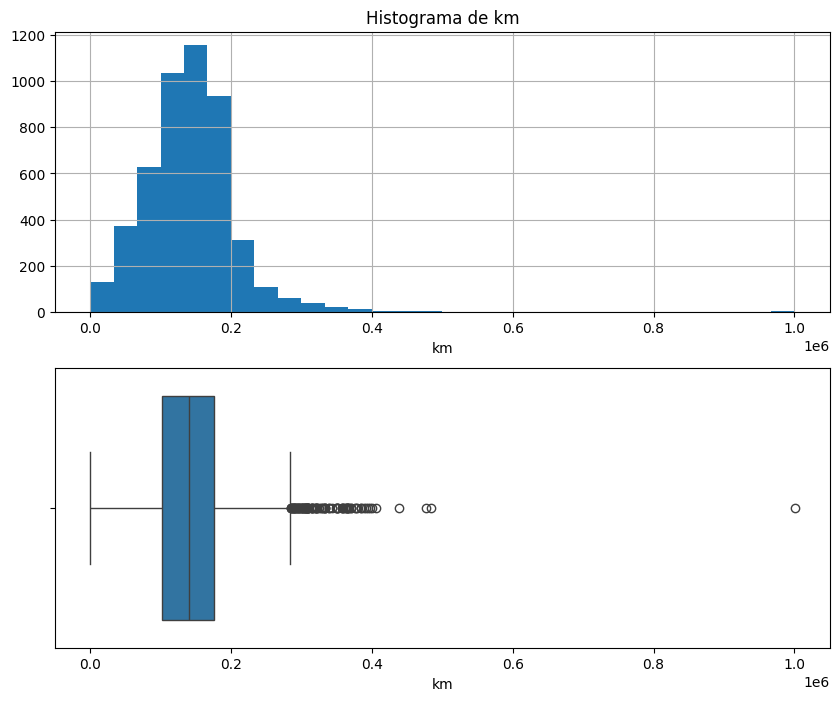

In [87]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

coches2['km'].hist(bins=30, ax=ax1)
ax1.set_title('Histograma de km')
ax1.set_xlabel('km')

sns.boxplot(x=coches2['km'], ax=ax2)
ax2.set_xlabel('km')

plt.show()

In [88]:
coches2['km'].describe()

count    4.817000e+03
mean     1.409353e+05
std      6.024268e+04
min     -6.400000e+01
25%      1.027580e+05
50%      1.409910e+05
75%      1.752350e+05
max      1.000376e+06
Name: km, dtype: float64

Vemos claramente que tenemos outliers los cuales hay que corregir o eliminar. En este caso eliminamos aquellos valores por debajo de 0 y por encima de 1e6.

In [89]:
coches2[coches2['km']<0]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_AÑO,fecha_venta_AÑO,dif_años
2938,640 Gran Coupé,-64.0,230.0,diesel,black,sedan,1,1,0,0,0,1,Sí,75000.0,NaN,2018.0,NaN


In [90]:
coches2[coches2['km']>1e6]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_AÑO,fecha_venta_AÑO,dif_años
3732,118,1000376.0,90.0,diesel,Desconocido,Desconocido,1,0,0,0,0,1,No,1400.0,2005.0,2018.0,13.0


Vemos claramente que tenemos outliers los cuales hay que corregir o eliminar. 

El valor que se encuentra por debajo de 0 nos disponemos a eliminarlo porque se debe de tratar de un error. No podemos inferir de ninguna manera los km porque no sabemos la fecha de registro, valor directamente relacionado con el kilometraje.

Por otro lado, el valor que despunta sobre el resto también lo eliminamos porque se trata de una excepción.

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='km'>

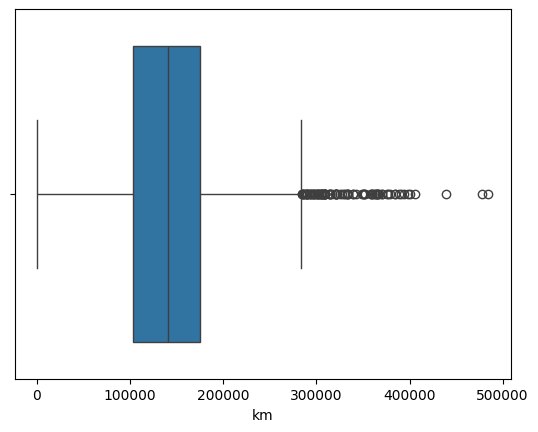

In [91]:
coches2.drop(coches2[coches2['km']<0].index,inplace=True)
coches2.drop(coches2[coches2['km']>1e6].index,inplace=True)

sns.boxplot(x=coches2['km'])

### Potencia

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


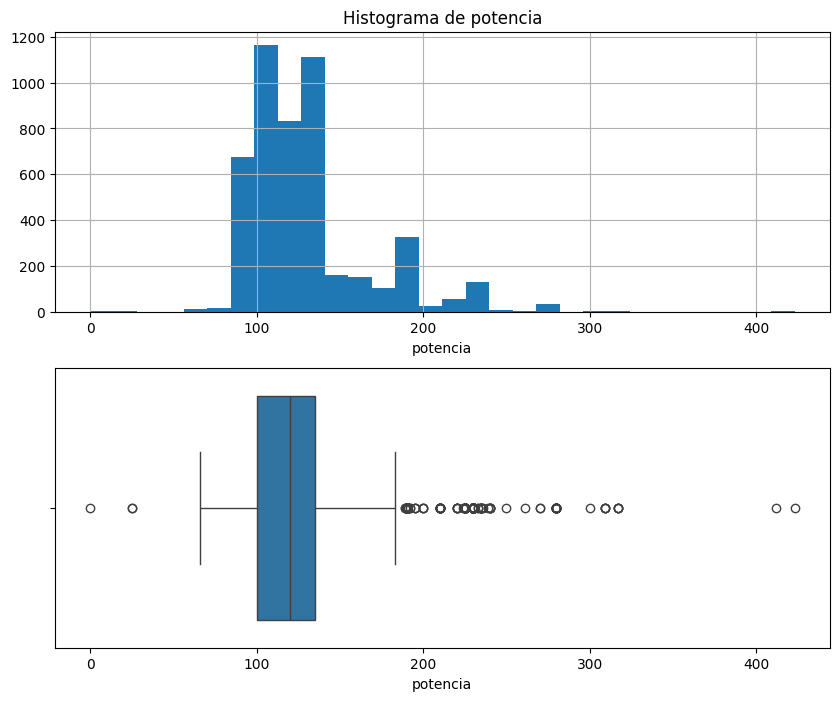

In [92]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

coches2['potencia'].hist(bins=30, ax=ax1)
ax1.set_title('Histograma de potencia')
ax1.set_xlabel('potencia')

sns.boxplot(x=coches2['potencia'], ax=ax2)
ax2.set_xlabel('potencia')

plt.show()

In [93]:
coches2['potencia'].describe()

count    4815.000000
mean      128.971963
std        38.981751
min         0.000000
25%       100.000000
50%       120.000000
75%       135.000000
max       423.000000
Name: potencia, dtype: float64

In [94]:
coches2[coches2['potencia']<50]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_AÑO,fecha_venta_AÑO,dif_años
1796,i3,152328.0,25.0,hybrid_petrol,black,Desconocido,0,1,0,0,0,1,Desconocido,20300.0,2012.0,2018.0,6.0
1925,i3,152470.0,25.0,hybrid_petrol,black,hatchback,0,1,0,0,0,1,Sí,15500.0,2012.0,2018.0,6.0
3765,X1,81770.0,0.0,diesel,white,suv,0,0,0,0,0,0,Desconocido,11700.0,2014.0,2018.0,4.0


Vemos que tenemos 3 outliers. Uno de ellos se debe claramente a un error ya que la potencia resulta 0. En los otros se trata de outliers, coches únicos los cuales se escapan de los valores más frecuentes y por lo tanto los eliminamos del dataset.

In [95]:
coches2[coches2['potencia']>350]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_AÑO,fecha_venta_AÑO,dif_años
3601,M5,150187.0,412.0,petrol,white,sedan,1,1,1,1,1,1,Sí,41600.0,2012.0,2018.0,6.0
4146,X6 M,2970.0,423.0,petrol,red,suv,1,1,1,0,0,1,Sí,82400.0,2016.0,2018.0,2.0


In [96]:
coches2[(coches2['modelo']=='X1')&(coches2['tipo_coche']=='suv')&(coches2['fecha_registro_AÑO']==2014)&(coches2['aire_acondicionado']==0)]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_AÑO,fecha_venta_AÑO,dif_años
3758,X1,170847.0,135.0,diesel,blue,suv,0,0,0,0,0,1,No,10900.0,2014.0,2018.0,4.0
3764,X1,127454.0,120.0,diesel,white,suv,0,0,0,0,0,0,No,5500.0,2014.0,2018.0,4.0
3765,X1,81770.0,0.0,diesel,white,suv,0,0,0,0,0,0,Desconocido,11700.0,2014.0,2018.0,4.0
3769,X1,82658.0,105.0,diesel,black,suv,0,0,0,0,0,0,Sí,16100.0,2014.0,2018.0,4.0
3779,X1,68086.0,105.0,diesel,blue,suv,0,0,0,0,0,0,Desconocido,13200.0,2014.0,2018.0,4.0
3804,X1,124980.0,105.0,diesel,white,suv,0,0,0,0,0,1,No,14100.0,2014.0,2018.0,4.0
3805,X1,44052.0,105.0,diesel,white,suv,0,0,0,0,0,0,No,15100.0,2014.0,2018.0,4.0
3810,X1,162683.0,85.0,diesel,white,suv,0,0,0,0,0,0,Sí,6000.0,2014.0,2018.0,4.0
3950,X1,139839.0,85.0,diesel,black,suv,0,0,0,1,1,1,No,11900.0,2014.0,2018.0,4.0
4185,X1,189429.0,135.0,diesel,Desconocido,suv,0,0,0,0,1,1,Sí,13700.0,2014.0,2018.0,4.0


Analizamos los coches modelo X1 para ver si podemos inferir la potencia del mismo. Vemos que se trata de un modelo con distintas potencias que van desde 85 hasta 135. (Hemos probado a en dicho valor poner una potencia de 105 ya que es la que le corresponde según la comparación que realizamos variable por variable, pero al imputar dicho valor el modelo no actúa bien no sabemos por qué razón). Es por ello que eliminamos dicha fila también.

In [97]:
coches2[(coches2['modelo']=='M5')]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_AÑO,fecha_venta_AÑO,dif_años
3601,M5,150187.0,412.0,petrol,white,sedan,1,1,1,1,1,1,Sí,41600.0,2012.0,2018.0,6.0


c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='potencia'>

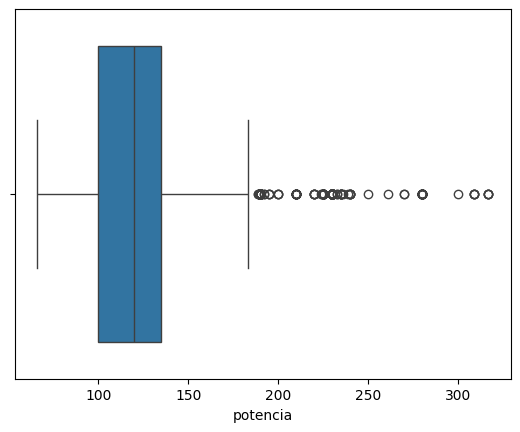

In [98]:
coches2.drop(coches2[coches2['potencia']<50].index,inplace=True)
coches2.drop(coches2[coches2['potencia']>350].index,inplace=True)

sns.boxplot(x=coches2['potencia'])

### Fecha registro año

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


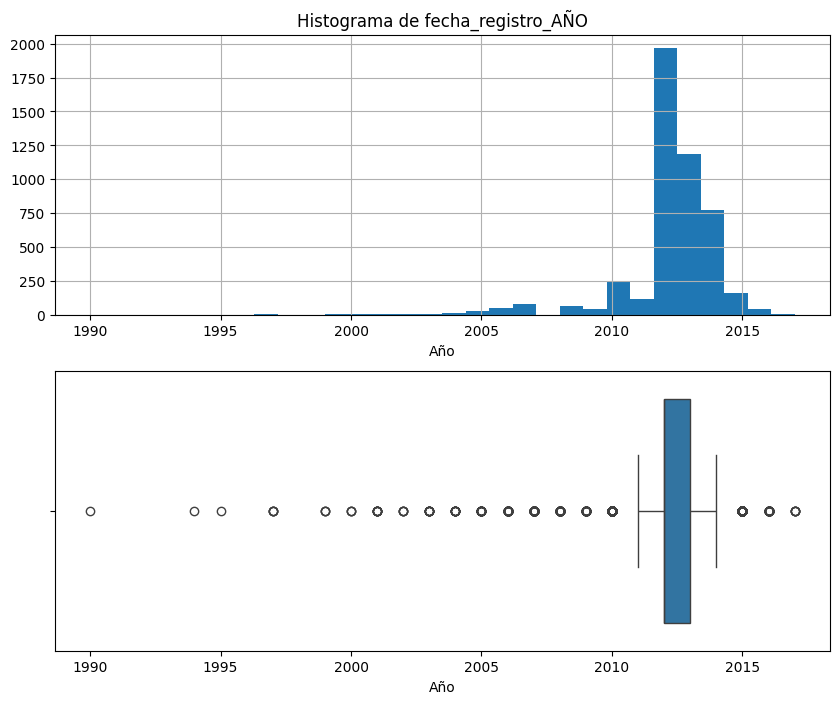

In [99]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

coches2['fecha_registro_AÑO'].hist(bins=30, ax=ax1)
ax1.set_title('Histograma de fecha_registro_AÑO')
ax1.set_xlabel('Año')

sns.boxplot(x=coches2['fecha_registro_AÑO'], ax=ax2)
ax2.set_xlabel('Año')

plt.show()

In [100]:
coches2['fecha_registro_AÑO'].describe()

count    4810.000000
mean     2012.220998
std         2.021000
min      1990.000000
25%      2012.000000
50%      2012.000000
75%      2013.000000
max      2017.000000
Name: fecha_registro_AÑO, dtype: float64

In [101]:
coches2['fecha_registro_AÑO'].value_counts()

fecha_registro_AÑO
2012.0    1968
2013.0    1184
2014.0     775
2010.0     248
2015.0     162
2011.0     117
2007.0      82
2008.0      66
2006.0      48
2016.0      45
2009.0      39
2005.0      27
2004.0      10
2003.0       9
2001.0       8
2017.0       5
2002.0       4
1997.0       4
2000.0       3
1999.0       3
1995.0       1
1990.0       1
1994.0       1
Name: count, dtype: int64

In [102]:
coches2[coches2['fecha_registro_AÑO']<2000]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_AÑO,fecha_venta_AÑO,dif_años
25,318,196092.0,85.0,petrol,Desconocido,convertible,1,0,0,0,0,0,No,1800.0,1995.0,2018.0,23.0
2473,525,230578.0,85.0,diesel,Desconocido,sedan,0,1,0,0,0,1,Desconocido,200.0,1997.0,2018.0,21.0
2574,525,229880.0,85.0,diesel,black,sedan,0,1,0,0,0,1,No,200.0,1997.0,2018.0,21.0
2591,316,178231.0,77.0,petrol,green,sedan,0,0,0,0,1,1,No,700.0,1999.0,2018.0,19.0
2611,525,230264.0,85.0,diesel,black,sedan,0,0,0,0,0,1,No,200.0,1997.0,2018.0,21.0
2771,316,146951.0,66.0,petrol,white,sedan,0,0,0,0,0,0,No,1300.0,1990.0,2018.0,28.0
3062,318,98097.0,85.0,petrol,blue,sedan,1,0,0,0,0,1,Sí,400.0,1994.0,2018.0,24.0
3380,525,245302.0,105.0,diesel,green,Desconocido,0,1,0,0,0,1,Sí,900.0,1997.0,2018.0,21.0
3387,525,266641.0,85.0,diesel,black,sedan,1,0,0,0,0,1,No,800.0,1999.0,2018.0,19.0
3449,316,184233.0,77.0,petrol,Desconocido,sedan,0,0,0,0,0,1,No,400.0,1999.0,2018.0,19.0


Vemos que los valores tienen sentido pero claramente se trata de outliers. Decidimos quedarnos solo con los registros posteriores al 2000, ya que las ventas antes de dicha fecha representan un porcentaje muy bajo de las ventas.

array([[<Axes: title={'center': 'fecha_registro_AÑO'}>]], dtype=object)

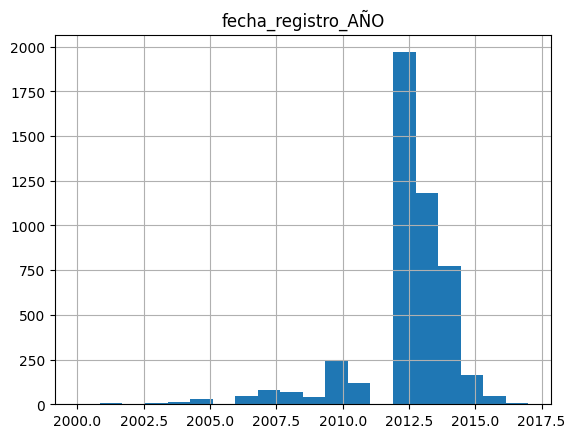

In [103]:
coches2.drop(coches2[coches2['fecha_registro_AÑO']<2000].index,inplace=True)

coches2.hist('fecha_registro_AÑO',bins=20)

### Fecha venta año

In [104]:
coches2['fecha_venta_AÑO'].value_counts()

fecha_venta_AÑO
2018.0    4796
2007.0       1
2010.0       1
2009.0       1
2008.0       1
Name: count, dtype: int64

In [105]:
coches2[coches2['fecha_venta_AÑO']<2016]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_AÑO,fecha_venta_AÑO,dif_años
42,330,142483.0,180.0,diesel,blue,convertible,1,1,0,1,0,1,Sí,15800.0,2012.0,2007.0,-5.0
100,320,342768.0,135.0,diesel,black,Desconocido,0,1,0,1,0,1,Desconocido,8200.0,2011.0,2010.0,-1.0
180,320,181052.0,120.0,diesel,black,estate,0,1,0,0,0,1,Desconocido,11500.0,2012.0,2009.0,-3.0
256,316,201102.0,85.0,diesel,black,estate,1,1,0,0,0,1,No,8800.0,2013.0,2008.0,-5.0


Vemos que tenemos 4 outliers los cuales podemos eliminar debido a que representan un porcentaje ínfimo de nuestro dataset. Además coincide que la diferencia en años de estos vehículos es negativa lo cual no podría ser podible.

In [106]:
coches2.drop(coches2[coches2['fecha_venta_AÑO']<2016].index,inplace=True)

In [107]:
coches2['fecha_venta_AÑO'].value_counts()

fecha_venta_AÑO
2018.0    4796
Name: count, dtype: int64

Observamos que la fecha de venta es siempre la misma eliminando estos outliers por lo que podemos suponer que se trata de un dataset de los BMW vendidos en dicho año. Por lo tanto esta columna también la podemos eliminar ya que no aporta ningún tipo de información al ser todos sus valores iguales.

In [108]:
del coches2['fecha_venta_AÑO']

### Diferencia en años

array([[<Axes: title={'center': 'dif_años'}>]], dtype=object)

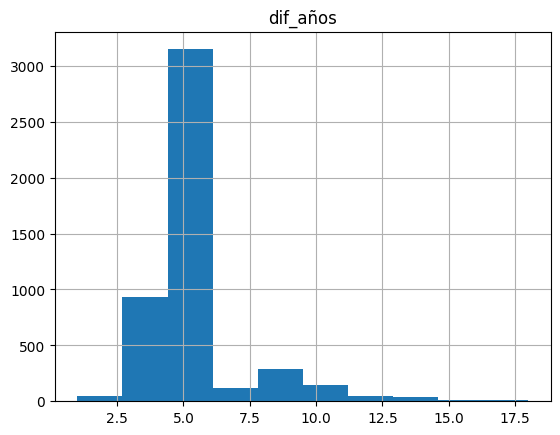

In [109]:
coches2.hist('dif_años')

In [110]:
coches2['dif_años'].describe()

count    4796.000000
mean        5.745830
std         1.886297
min         1.000000
25%         5.000000
50%         6.000000
75%         6.000000
max        18.000000
Name: dif_años, dtype: float64

<a id='booleanas'></a>
## Analizamos variables booleanas
[Volver al índice](#index)

En este apartado realizamos un análisis de las variables booleanas.

In [111]:
booleanas

['volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'elevalunas_electrico',
 'bluetooth',
 'gps']

In [112]:
coches2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4796 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4796 non-null   object 
 1   km                    4796 non-null   float64
 2   potencia              4796 non-null   float64
 3   tipo_gasolina         4796 non-null   object 
 4   color                 4796 non-null   object 
 5   tipo_coche            4796 non-null   object 
 6   volante_regulable     4796 non-null   int32  
 7   aire_acondicionado    4796 non-null   int32  
 8   camara_trasera        4796 non-null   int32  
 9   elevalunas_electrico  4796 non-null   int32  
 10  bluetooth             4796 non-null   int32  
 11  gps                   4796 non-null   int32  
 12  alerta_lim_velocidad  4796 non-null   object 
 13  precio                4796 non-null   float64
 14  fecha_registro_AÑO    4796 non-null   float64
 15  dif_años              4796

In [113]:
for col in booleanas:
    print(f'Porcentajes en {col} de --- TRUE: {round(coches2[col].mean()*100,2)} FALSE: {round(100-(coches2[col].mean()*100),2)}')

Porcentajes en volante_regulable de --- TRUE: 55.09 FALSE: 44.91
Porcentajes en aire_acondicionado de --- TRUE: 81.71 FALSE: 18.29
Porcentajes en camara_trasera de --- TRUE: 20.18 FALSE: 79.82
Porcentajes en elevalunas_electrico de --- TRUE: 46.21 FALSE: 53.79
Porcentajes en bluetooth de --- TRUE: 20.62 FALSE: 79.38
Porcentajes en gps de --- TRUE: 93.29 FALSE: 6.71


<a id='corr'></a>
## Correlación entre variables
[Volver al índice](#index)

En este apartado inferimos la relación lineal que existe entre las diferentes variables

In [114]:
coches3 = coches2.copy()

In [115]:
corr = coches3.corr(numeric_only = True)
corr.style.background_gradient(cmap ='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,precio,fecha_registro_AÑO,dif_años
km,1.000000,-0.042085,0.067740,0.022146,0.005514,0.051590,-0.029877,0.158595,-0.410691,-0.618219,0.618219
potencia,-0.042085,1.000000,0.327123,0.179125,0.310325,0.344265,0.203650,0.003579,0.634723,0.053500,-0.053500
volante_regulable,0.067740,0.327123,1.000000,0.288587,0.252486,0.277684,0.124522,0.243514,0.267427,-0.075681,0.075681
aire_acondicionado,0.022146,0.179125,0.288587,1.000000,0.142466,0.256653,0.102457,0.340800,0.220613,0.120660,-0.120660
camara_trasera,0.005514,0.310325,0.252486,0.142466,1.000000,0.197700,0.125043,0.060178,0.249842,-0.029206,0.029206
elevalunas_electrico,0.051590,0.344265,0.277684,0.256653,0.197700,1.000000,0.231581,0.201839,0.263638,0.032542,-0.032542
bluetooth,-0.029877,0.203650,0.124522,0.102457,0.125043,0.231581,1.000000,0.114085,0.185012,0.047988,-0.047988
gps,0.158595,0.003579,0.243514,0.340800,0.060178,0.201839,0.114085,1.000000,-0.011662,-0.100784,0.100784
precio,-0.410691,0.634723,0.267427,0.220613,0.249842,0.263638,0.185012,-0.011662,1.000000,0.396230,-0.396230
fecha_registro_AÑO,-0.618219,0.053500,-0.075681,0.120660,-0.029206,0.032542,0.047988,-0.100784,0.396230,1.000000,-1.000000


Con la correlación de variables podemos destacar las siguientes relaciones. Se observa una relación inversamente proporcional significativa (-0.41) entre el precio y los kilómetros (tiene sentido que, cuantos más kilómetros tenga el vehículo, menor sea su precio). Por otro lado, el precio está relacionado de manera directa con la potencia, con una correlación de 0.63, siendo la variable que más correlación guarda con el precio. También se observa una relación de -1 entre fecha_registro_AÑO y dif_años (esto tiene mucho sentido, ya que una variable se obtiene a través de la otra y, además, sabiendo que el único año de ventas es 2018, ambas variables explican exactamente lo mismo). En este caso, eliminamos, por lo tanto, la variable fecha_registro_AÑO y mantenemos la variable dif_años (antigüedad) observando que guarda una relación directamente proporcional con los kilómetros e inversamente proporcional con el precio.

In [116]:
del coches3['fecha_registro_AÑO']

<a id='target'></a>
## Análisis del Target
[Volver al índice](#index)

En este apartado realizamos un análisis del target.

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


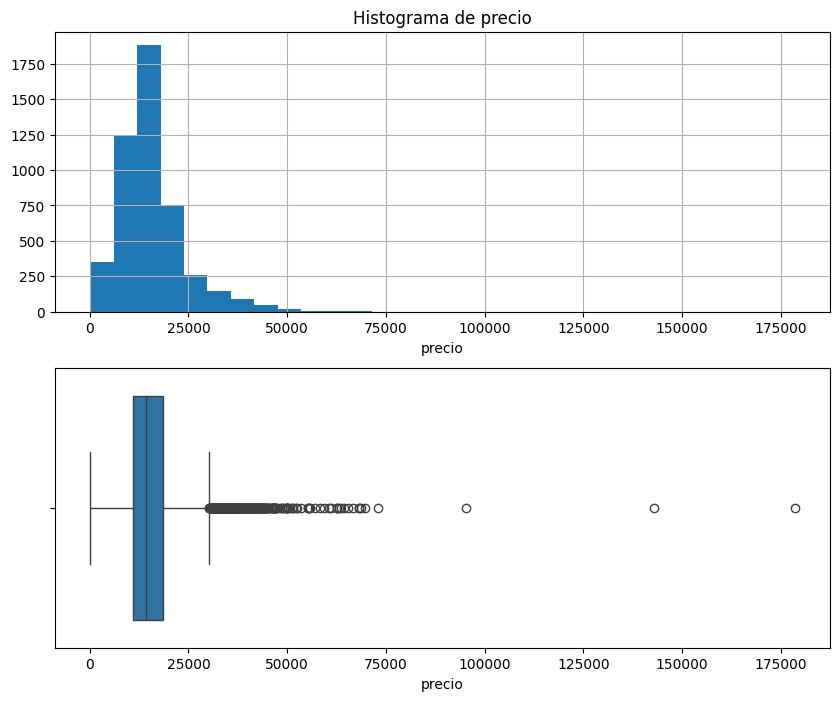

In [117]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

coches2['precio'].hist(bins=30, ax=ax1)
ax1.set_title('Histograma de precio')
ax1.set_xlabel('precio')

sns.boxplot(x=coches2['precio'], ax=ax2)
ax2.set_xlabel('precio')

plt.show()

In [118]:
coches3['precio'].describe()

count      4796.000000
mean      15848.832360
std        9115.278211
min         100.000000
25%       10900.000000
50%       14200.000000
75%       18625.000000
max      178500.000000
Name: precio, dtype: float64

In [119]:
coches3[coches3['precio']>80000]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,dif_años
90,i8,12402.0,170.0,hybrid_petrol,grey,coupe,1,1,0,0,0,0,Sí,95200.0,4.0
4684,X4,103222.0,140.0,diesel,grey,suv,1,1,0,1,0,1,Sí,142800.0,4.0
4753,X3,72515.0,135.0,diesel,blue,suv,0,0,1,0,0,0,Sí,178500.0,5.0


In [120]:
coches3[coches3['modelo']=='i8']

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,dif_años
90,i8,12402.0,170.0,hybrid_petrol,grey,coupe,1,1,0,0,0,0,Sí,95200.0,4.0


In [121]:
coches3[(coches3['modelo']=='X3')&(coches3['potencia']==135)&(coches3['km'].between(70000,80000))&(coches3['precio']<178500)]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,dif_años
3755,X3,73086.0,135.0,diesel,black,Desconocido,0,0,0,0,0,0,Sí,17500.0,5.0
3873,X3,77851.0,135.0,diesel,white,suv,0,0,0,0,0,0,No,15900.0,5.0
4378,X3,72592.0,135.0,diesel,black,suv,0,0,0,0,0,0,Sí,24200.0,5.0
4473,X3,71890.0,135.0,diesel,blue,suv,1,1,1,1,0,1,No,23000.0,6.0
4744,X3,75515.0,135.0,diesel,grey,Desconocido,0,1,0,1,0,1,Sí,17800.0,5.0


In [122]:
coches3[(coches3['modelo']=='X4')&(coches3['potencia']==140)].head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,dif_años
3891,X4,95351.0,140.0,diesel,grey,Desconocido,1,1,1,0,1,0,Sí,28600.0,4.0
3897,X4,48988.0,140.0,diesel,blue,suv,1,1,0,1,0,1,Sí,34500.0,3.0
3903,X4,87161.0,140.0,diesel,black,suv,1,1,0,0,0,0,Sí,28200.0,5.0
3928,X4,50003.0,140.0,diesel,black,suv,1,1,0,1,0,1,Sí,36900.0,5.0
3975,X4,66809.0,140.0,diesel,black,Desconocido,1,1,0,1,0,1,Sí,30600.0,3.0


Vemos que tenemos tres outliers muy diferenciados del resto. Uno es claramente una excepción y el resto se deben de tratar de fallos en los que podríamos imputar en el precio la media o mediana de modelos con potencia y tipo de coche equivalentes. Como se trata de el target, eliminamos directamente los outliers.

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='precio'>

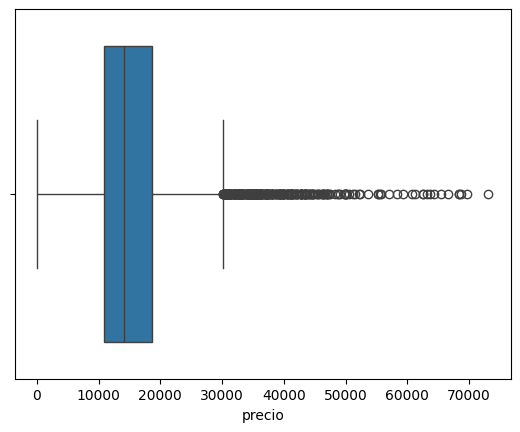

In [123]:
coches3.drop(coches3[coches3['precio']>80000].index,inplace=True)
sns.boxplot(data=coches3,x='precio')

array([[<Axes: title={'center': 'precio'}>]], dtype=object)

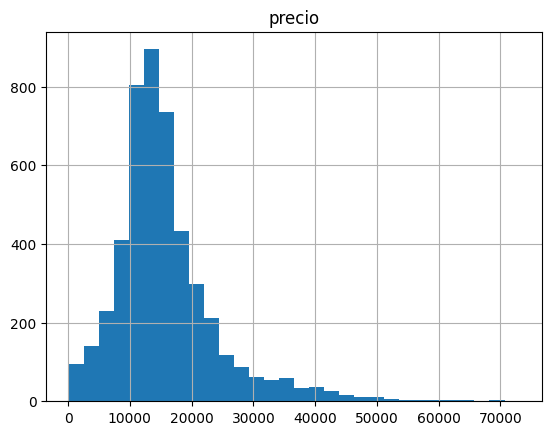

In [124]:
coches3.hist('precio',bins=30)

### Target vs Values

### Variables categóricas y booleanas vs target

In [125]:
categoricas + booleanas

['modelo',
 'tipo_gasolina',
 'color',
 'tipo_coche',
 'alerta_lim_velocidad',
 'volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'elevalunas_electrico',
 'bluetooth',
 'gps']

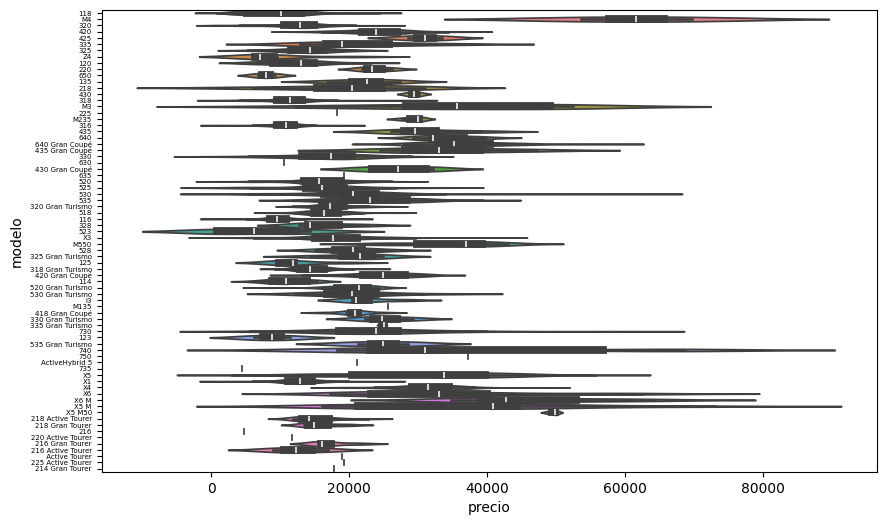

In [126]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=coches3,y='modelo',x='precio',hue='modelo')
plt.yticks(fontsize=5)  
plt.show()

Destaca sobre todos el modelo M4, es el más caro en media de todo el dataset, con un precio medio de entorno a los 61000.

<Axes: xlabel='precio', ylabel='tipo_gasolina'>

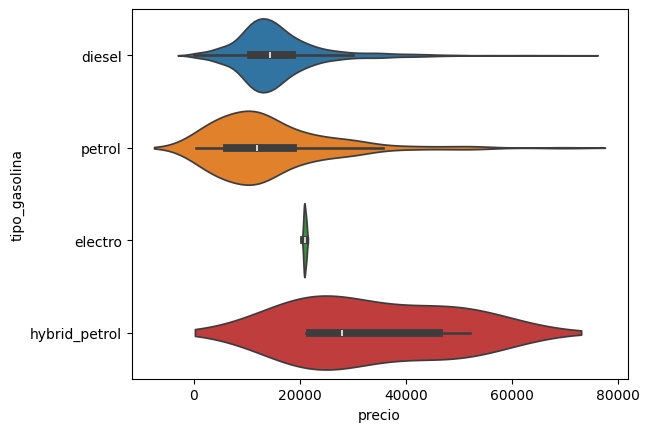

In [127]:
sns.violinplot(data=coches3,y='tipo_gasolina',x='precio',hue='tipo_gasolina')

In [128]:
coches3['tipo_gasolina'].value_counts()

tipo_gasolina
diesel           4601
petrol            184
hybrid_petrol       5
electro             3
Name: count, dtype: int64

Se observa en este caso que tanto los diesel como los petrol no tienen tanta diferencia de precio entre sí. Sin embargo, tanto las pocas muestras de coches eléctricos como hybrid_petrol sí que son más caras. Debido al bajo número de estos coches yo optaría por directamente eliminarlos.

In [129]:
coches3.drop(coches3[coches3['tipo_gasolina'].isin(['electro','hybrid_petrol'])].index,inplace=True)

<Axes: xlabel='precio', ylabel='color'>

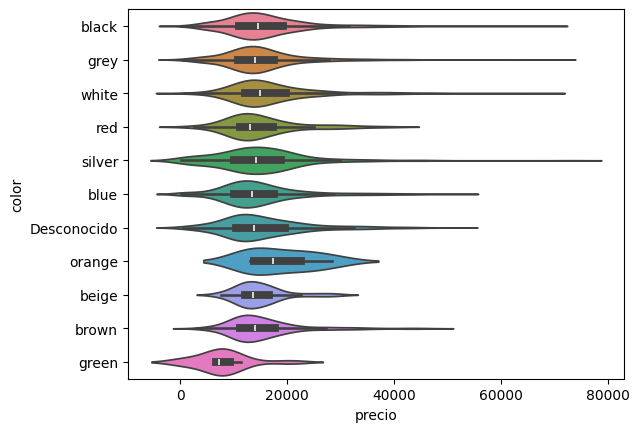

In [130]:
sns.violinplot(data=coches3,y='color',x='precio',hue='color')

El color no influye de manera muy significativa en el precio, salvo para el color verde que es aparentemente más barato que el resto.

<Axes: xlabel='precio', ylabel='tipo_coche'>

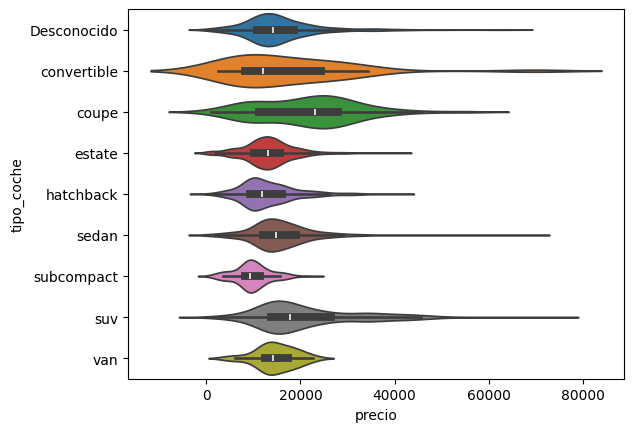

In [131]:
sns.violinplot(data=coches3,y='tipo_coche',x='precio',hue='tipo_coche')

Vemos que los coupe son de media más caros que el resto de tipos de coche que se encuentran más o menos en el mismo rango.

<Axes: xlabel='precio', ylabel='alerta_lim_velocidad'>

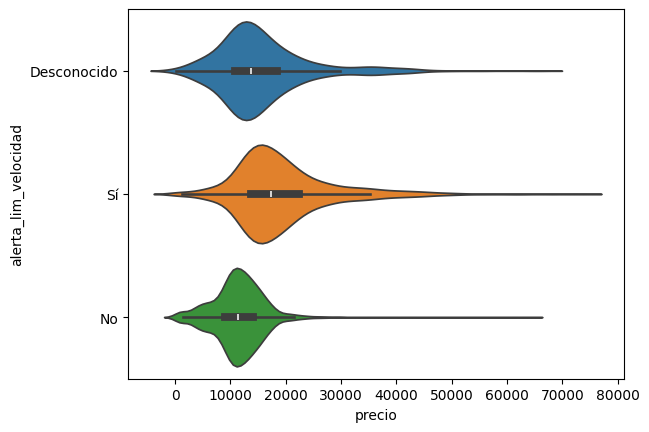

In [132]:
sns.violinplot(data=coches3,y='alerta_lim_velocidad',x='precio',hue='alerta_lim_velocidad')

In [133]:
for i in booleanas:
    print(coches3.groupby(i)['precio'].mean())

volante_regulable
0    13068.959108
1    17940.600076
Name: precio, dtype: float64
aire_acondicionado
0    11367.885714
1    16730.204604
Name: precio, dtype: float64
camara_trasera
0    14622.518984
1    20205.590062
Name: precio, dtype: float64
elevalunas_electrico
0    13499.261562
1    18367.269439
Name: precio, dtype: float64
bluetooth
0    14863.471161
1    19155.263158
Name: precio, dtype: float64
gps
0    15491.250000
1    15768.152296
Name: precio, dtype: float64


Por lo general vemos que la diferencia entre tener o no cierto tipo de extra es de unos 5k.

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5420\487930602.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=coches3, x=column, y='precio', palette='Wistia')
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5420\487930602.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=coches3, x=column, y='precio', palette='Wistia')
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5420\487930602.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=coches3, x=column, y='precio', palette='Wistia')
C:\Users\USUARIO\AppData\Local\Temp\i

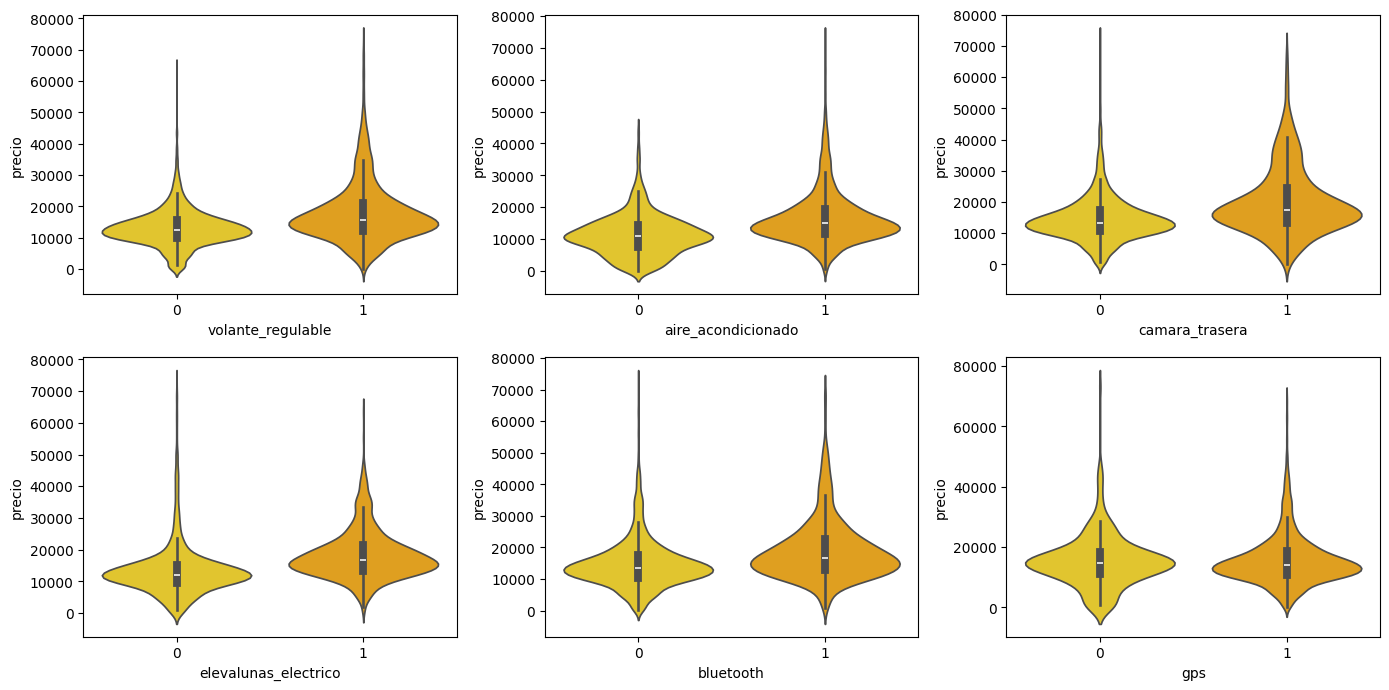

In [134]:
plt.figure(figsize=(14, 10))

# Crear un violinplot para cada columna booleana
for i, column in enumerate(booleanas, 1):
    plt.subplot(3, 3, i)
    sns.violinplot(data=coches3, x=column, y='precio', palette='Wistia')

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### Variables numéricas vs target

In [135]:
numericas

['km', 'potencia', 'fecha_registro_AÑO', 'fecha_venta_AÑO']

<Axes: xlabel='km', ylabel='precio'>

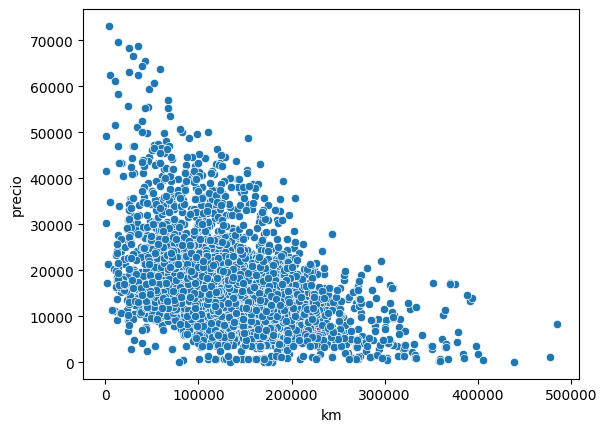

In [136]:
sns.scatterplot(data=coches3,x='km',y='precio')

Conforme más kilómetros tienen los coches, más baratos son, tal y como indicaba la correlación entre ambas variables.

<Axes: xlabel='potencia', ylabel='precio'>

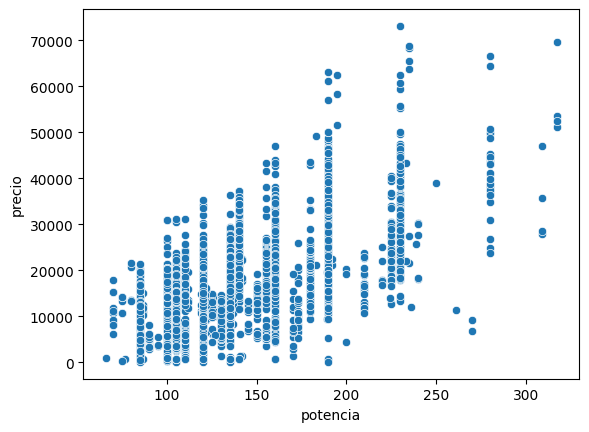

In [137]:
sns.scatterplot(data=coches3,x='potencia',y='precio')

En este caso se observa que cuanta más potencia tienen los coches, su precio aumenta.

<Axes: xlabel='dif_años', ylabel='precio'>

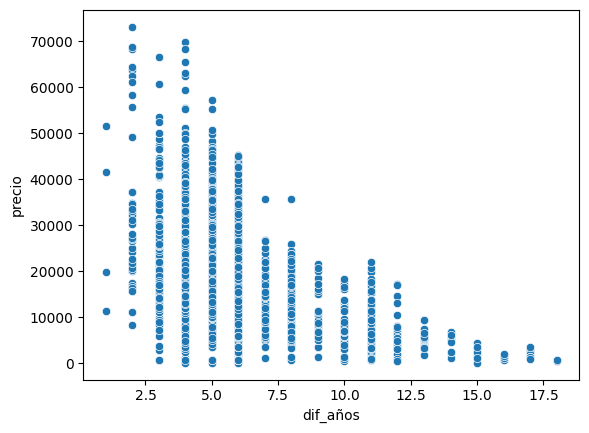

In [138]:
sns.scatterplot(data=coches3,x='dif_años',y='precio')

Por último, cuanto mayor es la antigüedad del vehículo, más barato es debido a que suele tener más kilómetros, mostrando así una relación inversa. A medida que la antigüedad aumenta, los precios máximos disminuyen de manera notable. Los coches con antigüedad de entre 10 y 15 años rara vez superan los 20,000 en precio mientras que los coches con más de 15 años suelen tener precios menores a 10,000.
Existe una alta concentración de puntos en los primeros 5 años de antigüedad, indicando que hay más datos para coches relativamente nuevos. A partir de los 5 años, los puntos comienzan a dispersarse más, reflejando una mayor variabilidad en los precios a medida que la antigüedad aumenta.

<a id='procesamiento'></a>
# Procesamiento de variables
[Volver al índice](#index)

En este apartado llevamos a cabo el procesamiento de las variables. Para realizar el mismo, aplicamos OneHotEncoding (OHE) mediante el método get_dummies para pasar las variables categóricas a numéricas y aplicamos un MinMaxEscaler para estandarizar las variables.

In [139]:
coches3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4785 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4785 non-null   object 
 1   km                    4785 non-null   float64
 2   potencia              4785 non-null   float64
 3   tipo_gasolina         4785 non-null   object 
 4   color                 4785 non-null   object 
 5   tipo_coche            4785 non-null   object 
 6   volante_regulable     4785 non-null   int32  
 7   aire_acondicionado    4785 non-null   int32  
 8   camara_trasera        4785 non-null   int32  
 9   elevalunas_electrico  4785 non-null   int32  
 10  bluetooth             4785 non-null   int32  
 11  gps                   4785 non-null   int32  
 12  alerta_lim_velocidad  4785 non-null   object 
 13  precio                4785 non-null   float64
 14  dif_años              4785 non-null   float64
dtypes: float64(4), int32(6), o

In [140]:
num,cat,bool = obtener_lista_variables(coches3)
print(num,'\n')
print(cat,'\n')
print(bool,'\n')

['km', 'potencia', 'dif_años'] 

['modelo', 'tipo_gasolina', 'color', 'tipo_coche', 'alerta_lim_velocidad'] 

['volante_regulable', 'aire_acondicionado', 'camara_trasera', 'elevalunas_electrico', 'bluetooth', 'gps'] 



## 6. Transformación de categóricas a numéricas, ¿Qué variables van a transformar? ¿Que técnica se va usar?

Como podemos observar solo nos quedan 5 variables categóricas. Es por ello que aplicamos el método get_dummies para transformar cada categoría en una columna con 0 y 1 según si pertenecen a dicha categoría o no.

In [141]:
coches3 = pd.get_dummies(data=coches3,columns=cat,dtype=int)

In [142]:
pd.set_option('display.max_columns', None)
coches3.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,precio,dif_años,modelo_ Active Tourer,modelo_114,modelo_116,modelo_118,modelo_120,modelo_123,modelo_125,modelo_135,modelo_214 Gran Tourer,modelo_216,modelo_216 Active Tourer,modelo_216 Gran Tourer,modelo_218,modelo_218 Active Tourer,modelo_218 Gran Tourer,modelo_220,modelo_220 Active Tourer,modelo_225,modelo_225 Active Tourer,modelo_316,modelo_318,modelo_318 Gran Turismo,modelo_320,modelo_320 Gran Turismo,modelo_325,modelo_325 Gran Turismo,modelo_328,modelo_330,modelo_330 Gran Turismo,modelo_335,modelo_335 Gran Turismo,modelo_418 Gran Coupé,modelo_420,modelo_420 Gran Coupé,modelo_425,modelo_430,modelo_430 Gran Coupé,modelo_435,modelo_435 Gran Coupé,modelo_518,modelo_520,modelo_520 Gran Turismo,modelo_523,modelo_525,modelo_528,modelo_530,modelo_530 Gran Turismo,modelo_535,modelo_535 Gran Turismo,modelo_630,modelo_635,modelo_640,modelo_640 Gran Coupé,modelo_650,modelo_730,modelo_735,modelo_740,modelo_750,modelo_M135,modelo_M235,modelo_M3,modelo_M4,modelo_M550,modelo_X1,modelo_X3,modelo_X4,modelo_X5,modelo_X5 M,modelo_X5 M50,modelo_X6,modelo_X6 M,modelo_Z4,tipo_gasolina_diesel,tipo_gasolina_petrol,color_Desconocido,color_beige,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_red,color_silver,color_white,tipo_coche_Desconocido,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,alerta_lim_velocidad_Desconocido,alerta_lim_velocidad_No,alerta_lim_velocidad_Sí
0,140411.0,100.0,1,1,0,1,0,1,11300.0,6.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,13929.0,317.0,1,1,0,0,1,1,69700.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,183297.0,120.0,0,0,0,1,0,1,10200.0,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
3,128035.0,135.0,1,1,0,1,1,1,25100.0,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,97097.0,160.0,1,1,0,0,1,1,33400.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1


In [143]:
coches3.shape

(4785, 107)

## 7. Escalar variables (usando minmaxscaler) y luego aplicar la correlación final de variables ¿Hay alguna variable finalmente correlacionada?

In [144]:
MinMax = MinMaxScaler()
coches3[num] = MinMax.fit_transform(coches3[num]) # Transformamos las variables numéricas del dataset con MinMaxScaler

In [145]:
coches3.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,precio,dif_años,modelo_ Active Tourer,modelo_114,modelo_116,modelo_118,modelo_120,modelo_123,modelo_125,modelo_135,modelo_214 Gran Tourer,modelo_216,modelo_216 Active Tourer,modelo_216 Gran Tourer,modelo_218,modelo_218 Active Tourer,modelo_218 Gran Tourer,modelo_220,modelo_220 Active Tourer,modelo_225,modelo_225 Active Tourer,modelo_316,modelo_318,modelo_318 Gran Turismo,modelo_320,modelo_320 Gran Turismo,modelo_325,modelo_325 Gran Turismo,modelo_328,modelo_330,modelo_330 Gran Turismo,modelo_335,modelo_335 Gran Turismo,modelo_418 Gran Coupé,modelo_420,modelo_420 Gran Coupé,modelo_425,modelo_430,modelo_430 Gran Coupé,modelo_435,modelo_435 Gran Coupé,modelo_518,modelo_520,modelo_520 Gran Turismo,modelo_523,modelo_525,modelo_528,modelo_530,modelo_530 Gran Turismo,modelo_535,modelo_535 Gran Turismo,modelo_630,modelo_635,modelo_640,modelo_640 Gran Coupé,modelo_650,modelo_730,modelo_735,modelo_740,modelo_750,modelo_M135,modelo_M235,modelo_M3,modelo_M4,modelo_M550,modelo_X1,modelo_X3,modelo_X4,modelo_X5,modelo_X5 M,modelo_X5 M50,modelo_X6,modelo_X6 M,modelo_Z4,tipo_gasolina_diesel,tipo_gasolina_petrol,color_Desconocido,color_beige,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_red,color_silver,color_white,tipo_coche_Desconocido,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,alerta_lim_velocidad_Desconocido,alerta_lim_velocidad_No,alerta_lim_velocidad_Sí
0,0.289039,0.135458,1,1,0,1,0,1,11300.0,0.294118,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.027787,1.000000,1,1,0,0,1,1,69700.0,0.176471,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0.377621,0.215139,0,0,0,1,0,1,10200.0,0.294118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
3,0.263476,0.274900,1,1,0,1,1,1,25100.0,0.294118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0.199573,0.374502,1,1,0,0,1,1,33400.0,0.235294,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1


In [146]:
corr2 = coches3.corr() 
corr2.style.background_gradient(cmap='coolwarm')

In [147]:
corr2_long = corr2.stack().reset_index()
corr2_long.columns = ['Variable 1', 'Variable 2', 'Correlación']

# Filtrar los valores duplicados y las autocorrelaciones
corr2_long = corr2_long[corr2_long['Variable 1'] != corr2_long['Variable 2']]
corr2_long['abs_Correlación'] = corr2_long['Correlación'].abs()
corr2_long = corr2_long.drop_duplicates(subset=['Correlación'])

# Ordenar los valores por la correlación absoluta
corr2_long = corr2_long.sort_values(by='abs_Correlación', ascending=False)

# Mostrar las correlaciones más altas, tanto positivas como negativas
corr2_long.head(20)

,Variable 1,Variable 2,Correlación,abs_Correlación
8857,tipo_gasolina_diesel,tipo_gasolina_petrol,-1.000000,1.000000
11341,alerta_lim_velocidad_No,alerta_lim_velocidad_Sí,-0.737457,0.737457
115,potencia,precio,0.676159,0.676159
9,km,dif_años,0.617721,0.617721
2564,modelo_218 Active Tourer,tipo_coche_van,0.522394,0.522394
8020,modelo_X3,tipo_coche_suv,0.483614,0.483614
4591,modelo_420,tipo_coche_coupe,0.448473,0.448473
212,potencia,alerta_lim_velocidad_No,-0.429655,0.429655
213,potencia,alerta_lim_velocidad_Sí,0.427298,0.427298
8,km,precio,-0.427114,0.427114


In [148]:
del coches3['tipo_gasolina_petrol']

Además de las correlaciones que ya veíamos antes podemos destacar algunas conclusiones más:

•	Existe una correlación perfecta negativa (-1.000000) entre tipo_gasolina_diesel y tipo_gasolina_petrol, indicando que si un coche es diésel, no puede ser de gasolina y viceversa. Es por ello que eliminamos la variable tipo_gasolina_petrol, ya que no aporta  ningún tipo de información.

•	Se observa correlación alta negativa entre alerta_lim_velocidad_No y alerta_lim_velocidad_Sí (-0.73), similar al caso anterior salvo que esta vez no es relación de -1 por los nulos que había en esta columna.

•	Respecto a modelos se pueden observar diferentes relaciones entre estos y el tipo de coche. Por ejemplo, se observa una correlación entre el modelo_218 Active Tourer y el tipo de coche van (con correlación de 0.52) indicando que hay una gran parte de los cohes de este modelo que se tratan de coches tipo van. A su vez ocurre con los coches modelo_420 que suelen ser tipo coupe o los coches modelo_X3 que guardan una correlación de 0.48 con el tipo_suv.

•	Destaca también que hay cierta relación entre la alerta del límite de velocidad y el precio. En este caso hay una correlación de 0.39 en caso de tener la alerta, indicando una subida de precio, y una correlación de -0.4 en caso de no tenerla, indicando así la disminución del precio. Esto se debe a que la alerta_lim_velocidad guarda una correlación significativa (0.42 en valor absoluto) con la potencia que a su vez guarda una correlación directa con el precio.


## 8. Subir un pantallazo con el nombre de TODAS las columnas que tiene el dataframe final final vfin y el tipo de dato que tiene, tip lo más sencillo es hacer un .info al dataframe y tomarle un pantallazo y subirlo, importante deben aparecer TODAS las columnas

In [149]:
coches3.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 4785 entries, 0 to 4842
Data columns (total 106 columns):
 #    Column                            Dtype  
---   ------                            -----  
 0    km                                float64
 1    potencia                          float64
 2    volante_regulable                 int32  
 3    aire_acondicionado                int32  
 4    camara_trasera                    int32  
 5    elevalunas_electrico              int32  
 6    bluetooth                         int32  
 7    gps                               int32  
 8    precio                            float64
 9    dif_años                          float64
 10   modelo_ Active Tourer             int32  
 11   modelo_114                        int32  
 12   modelo_116                        int32  
 13   modelo_118                        int32  
 14   modelo_120                        int32  
 15   modelo_123                        int32  
 16   modelo_125                 

## 9. Exportar en un excel de las primeras 50 filas del dataset (df.to_excel(...)

In [150]:
coches3.head(50).to_excel('primeras_50_filas_coches.xlsx', index=False)

<a id='modelo'></a>
# EXTRA: Modelo de regresión lineal
[Volver al índice](#index)

A modo de comprobación de nuestro procesamiento y limpieza de datos hemos llevado a cabo un modelo de regresión lineal sencillo para ver de que manera afectaba el datacleaning a la predicción realizada por el modelo.

In [151]:
coches_modelo = coches3.copy()

In [152]:
X = coches_modelo.drop(['precio'],axis=1)
y = coches_modelo['precio']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=32)

In [153]:
reg = LinearRegression()
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

In [154]:
data_predict = pd.DataFrame({'Originales':y_test,'Predictions':predictions})
data_predict

,Originales,Predictions
2359,26200.0,25856.0
187,800.0,13056.0
918,14000.0,11712.0
1425,11200.0,11008.0
1836,15400.0,17152.0
...,...,...
3868,12400.0,11840.0
4181,13400.0,10560.0
2125,22400.0,22656.0
1686,17300.0,17088.0


In [155]:
data_predict[data_predict['Predictions']>70000]

,Originales,Predictions


In [156]:
df_resultados_ext = [data_predict,X_test]
df_resultados_ext2 = pd.concat(df_resultados_ext,axis=1)

In [157]:
df_resultados_ext2.head()

,Originales,Predictions,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,dif_años,modelo_ Active Tourer,modelo_114,modelo_116,modelo_118,modelo_120,modelo_123,modelo_125,modelo_135,modelo_214 Gran Tourer,modelo_216,modelo_216 Active Tourer,modelo_216 Gran Tourer,modelo_218,modelo_218 Active Tourer,modelo_218 Gran Tourer,modelo_220,modelo_220 Active Tourer,modelo_225,modelo_225 Active Tourer,modelo_316,modelo_318,modelo_318 Gran Turismo,modelo_320,modelo_320 Gran Turismo,modelo_325,modelo_325 Gran Turismo,modelo_328,modelo_330,modelo_330 Gran Turismo,modelo_335,modelo_335 Gran Turismo,modelo_418 Gran Coupé,modelo_420,modelo_420 Gran Coupé,modelo_425,modelo_430,modelo_430 Gran Coupé,modelo_435,modelo_435 Gran Coupé,modelo_518,modelo_520,modelo_520 Gran Turismo,modelo_523,modelo_525,modelo_528,modelo_530,modelo_530 Gran Turismo,modelo_535,modelo_535 Gran Turismo,modelo_630,modelo_635,modelo_640,modelo_640 Gran Coupé,modelo_650,modelo_730,modelo_735,modelo_740,modelo_750,modelo_M135,modelo_M235,modelo_M3,modelo_M4,modelo_M550,modelo_X1,modelo_X3,modelo_X4,modelo_X5,modelo_X5 M,modelo_X5 M50,modelo_X6,modelo_X6 M,modelo_Z4,tipo_gasolina_diesel,color_Desconocido,color_beige,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_red,color_silver,color_white,tipo_coche_Desconocido,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,alerta_lim_velocidad_Desconocido,alerta_lim_velocidad_No,alerta_lim_velocidad_Sí
2359,26200.0,25856.0,0.054507,0.274900,1,0,0,1,0,1,0.176471,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
187,800.0,13056.0,0.207661,0.215139,0,1,0,0,0,1,0.294118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
918,14000.0,11712.0,0.290237,0.274900,0,1,0,0,0,1,0.294118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1425,11200.0,11008.0,0.329248,0.135458,1,1,0,0,0,1,0.294118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1836,15400.0,17152.0,0.033565,0.175299,0,1,0,0,0,1,0.176471,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [158]:
df_resultados_ext2[df_resultados_ext2['Predictions']<0]

,Originales,Predictions,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,dif_años,modelo_ Active Tourer,modelo_114,modelo_116,modelo_118,modelo_120,modelo_123,modelo_125,modelo_135,modelo_214 Gran Tourer,modelo_216,modelo_216 Active Tourer,modelo_216 Gran Tourer,modelo_218,modelo_218 Active Tourer,modelo_218 Gran Tourer,modelo_220,modelo_220 Active Tourer,modelo_225,modelo_225 Active Tourer,modelo_316,modelo_318,modelo_318 Gran Turismo,modelo_320,modelo_320 Gran Turismo,modelo_325,modelo_325 Gran Turismo,modelo_328,modelo_330,modelo_330 Gran Turismo,modelo_335,modelo_335 Gran Turismo,modelo_418 Gran Coupé,modelo_420,modelo_420 Gran Coupé,modelo_425,modelo_430,modelo_430 Gran Coupé,modelo_435,modelo_435 Gran Coupé,modelo_518,modelo_520,modelo_520 Gran Turismo,modelo_523,modelo_525,modelo_528,modelo_530,modelo_530 Gran Turismo,modelo_535,modelo_535 Gran Turismo,modelo_630,modelo_635,modelo_640,modelo_640 Gran Coupé,modelo_650,modelo_730,modelo_735,modelo_740,modelo_750,modelo_M135,modelo_M235,modelo_M3,modelo_M4,modelo_M550,modelo_X1,modelo_X3,modelo_X4,modelo_X5,modelo_X5 M,modelo_X5 M50,modelo_X6,modelo_X6 M,modelo_Z4,tipo_gasolina_diesel,color_Desconocido,color_beige,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_red,color_silver,color_white,tipo_coche_Desconocido,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,alerta_lim_velocidad_Desconocido,alerta_lim_velocidad_No,alerta_lim_velocidad_Sí
2753,700.0,-704.0,0.554448,0.135458,0,0,0,0,0,1,0.588235,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
537,500.0,-192.0,0.622817,0.135458,0,1,0,0,0,1,0.529412,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1688,800.0,-12800.0,0.741878,0.215139,1,0,0,0,0,1,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1934,3800.0,-2240.0,0.664022,0.135458,0,0,0,0,0,1,0.529412,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3329,6100.0,-1536.0,0.649601,0.095618,0,1,0,0,0,1,0.647059,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
801,1900.0,-1216.0,0.407092,0.215139,1,0,0,0,0,1,0.941176,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1572,1200.0,-448.0,0.587104,0.175299,1,0,0,1,0,1,0.588235,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
179,1000.0,-576.0,0.623889,0.135458,0,1,0,0,0,1,0.529412,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1265,1200.0,-4096.0,0.587658,0.175299,1,0,0,1,0,1,0.823529,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2829,100.0,-8000.0,0.905905,0.155378,0,0,1,0,0,1,0.823529,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0

Vamos a eliminar este punto de ambos datasets, tanto el de y_test como en el de predictions

In [159]:
#y_test = y_test.drop([1899,1265,1934,801,3154,1809])
#predictions = predictions[(predictions <= 70000)&(predictions > 0)]

array([[<Axes: title={'center': 'Originales'}>]], dtype=object)

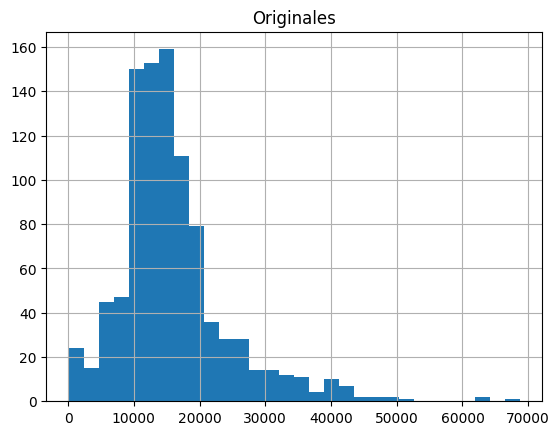

In [160]:
data_predict.hist('Originales',bins=30)

array([[<Axes: title={'center': 'Predictions'}>]], dtype=object)

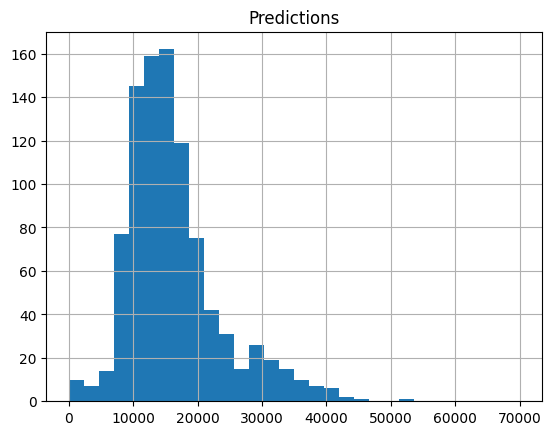

In [161]:
data_predict.hist('Predictions',range=[0,70000],bins=30)

Calculamos el root_mean_squared_error que es el error medio en las unidades de la variable target que tiene nuestro modelo. PRECIO +- RMSE

In [162]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error

print(root_mean_squared_error(y_test,predictions))

4055.2682197825416


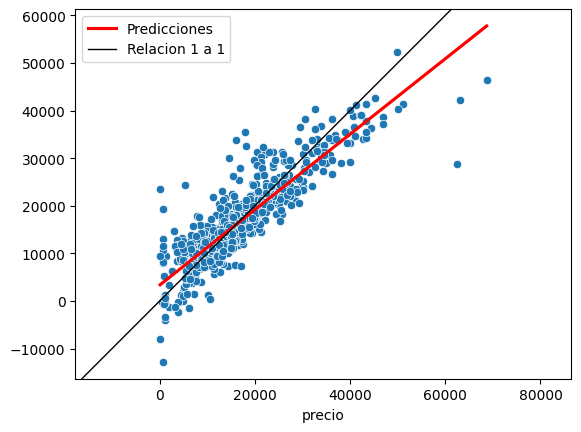

In [163]:
sns.scatterplot(x=y_test,y=predictions)
sns.regplot(x=y_test,y=predictions,ci=None,line_kws={'color':'red'},scatter=False,label='Predicciones')
plt.axline(xy1=(20,20),slope=1,linewidth=1,color='black',label='Relacion 1 a 1')
plt.axis('equal')
plt.legend()
plt.show()

In [164]:
reg.score(X_test,y_test)

0.7726684716765408